## 순위에 있는 책제목 꺼내기
주소: https://www.yes24.com/product/category/bestseller?categoryNumber=001&pageNumber=1&pageSize=24

In [31]:
class Book:
    def __init__(self, rank, title, author, price):
        self.rank = rank          # title_rank → rank 로 통일
        self.title = title
        self.author = author
        self.price = price

    def __str__(self):
        return f"{self.rank}, {self.title}, {self.author}, {self.price}"
    
    def to_dict(self):
        return {'rank': self.rank, 
                'title': self.title, 
                'author': self.author, 
                'price': self.price}
    
    def to_list(self):
        return [self.rank, 
                self.title, 
                self.author, 
                self.price]

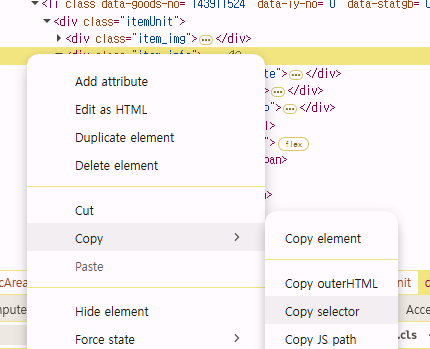

#yesBestList > li:nth-child(1) > div > div.item_info

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.yes24.com/product/category/bestseller?categoryNumber=001&pageNumber=1&pageSize=24' 
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
best_element = soup.select('#yesBestList div.item_info')
len(best_element)

24

In [3]:
# 도서 목록을 저장할 리스트를 선언
book_list = []
# 각 리스트에 요소를 찾아서 추가(append)
for i, item in enumerate(best_element):
    title = item.select_one("div.info_name > a").text
    author = item.select_one(".info_auth > a").text
    price = item.select_one(".info_price > .txt_num").text
    book_list.append(Book(i+1, title, author, price))
    
# 화면에 출력하기
for book in book_list:
    print(book)

1, 혼모노, 성해나, 16,200원
2, 류수영의 평생 레시피, 류수영, 22,500원
3, 가공범, 히가시노 게이고, 19,800원
4, 돌비공포라디오 더 레드, 돌비, 17,820원
5, 2025 큰별쌤 최태성의 별별한국사 기출 500제 한국사능력검정시험 심화(1,2,3급), 최태성, 17,550원
6, 료의 생각 없는 생각, 료, 18,000원
7, 박곰희 연금 부자 수업, 박곰희, 18,900원
8, 2025 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 상, 최태성, 14,850원
9, 단 한 줄만 내 마음에 새긴다고 해도, 나민애, 21,420원
10, 자몽살구클럽, 한로로, 10,800원
11, ETS 토익 정기시험 기출문제집 1000 Vol. 4 RC, ETS, 17,820원
12, 2025 큰별쌤 최태성의 별별한국사 한국사능력검정시험 심화(1,2,3급) 하, 최태성, 14,400원
13, ETS 토익 정기시험 기출문제집 1000 Vol. 4 LC, ETS, 17,820원
14, 안녕이라 그랬어, 김애란, 15,120원
15, 다크 심리학, 다크 사이드 프로젝트, 19,710원
16, 모순, 양귀자, 11,700원
17, 편안함의 습격, 마이클 이스터, 19,800원
18, 어른의 행복은 조용하다, 태수, 16,020원
19, 견우와 선녀 대본집 세트, 양지훈, 41,400원
20, 청춘의 독서, 유시민, 17,010원
21, 야구선수 김원중, 김원중, 18,000원
22, 소년이 온다, 한강, 13,500원
23, 첫 여름, 완주, 김금희, 15,300원
24, 경험의 멸종, 크리스틴 로젠, 17,820원


In [4]:
import sqlite3
con = sqlite3.connect('my_databace.DB')

In [5]:
query = """
CREATE TABLE IF NOT EXISTS BOOKS (
    RANK INTEGER PRIMARY KEY AUTOINCREMENT,
    TITLE TEXT,
    AUTHOR TEXT,
    PRICE INTEGER
)
"""
cur = con.cursor()
cur.execute(query)
con.commit()
con.close()

In [6]:
con = sqlite3.connect('my_databace.DB')
cur = con.cursor()
cur.execute(query)

In [7]:
ins_query = ''' 
INSERT INTO books (rank, title, author, price) VALUES(?,?,?,?)'''

for book in book_list:
    cur.execute(ins_query, book.to_list())

con.commit()
con.close()
    

### 여러 페이지 가지고오기

In [8]:
base_url = 'https://www.yes24.com/product/category/bestseller?categoryNumber=001&pageSize=24&pageNumber='
page_no = 3
book_list = []
for page in range(1,page_no+1):
  #페이지 연결
  url = f'{base_url}{page}'
  res = requests.get(url)
  soup = BeautifulSoup(res.content, 'html.parser')
  best_list_el = soup.select('#yesBestList div.item_info')
  #요소 추출
  for i, item in enumerate(best_list_el):
    title = item.select_one('div.info_name > a').text
    author = item.select_one('.info_auth > a').text
    price = item.select_one('div.info_price .txt_num').text
    book_list.append(Book(i+1,title, author, price))
    
  #len(best_list_el)
  #print (url)
len(book_list)

72

In [41]:
print(book_list[0])

1, 혼모노, 성해나, 16,200원


### SQL에 데이터 연결하기

1. 웹 스크래핑 준비(라이브러리)

In [42]:
pip install requests beautifulsoup4 pymysql


Note: you may need to restart the kernel to use updated packages.


2. 웹 페이지 요청 및 HTML 파싱

In [ ]:
# 웹 페이지 요청
base_url = 'https://www.yes24.com/product/category/bestseller?categoryNumber=001&pageSize=24&pageNumber='
page_no = 3
book_list = []

for page in range(1,page_no+1):
  #페이지 연결
  url = f'{base_url}{page}'
  res = requests.get(url)
  soup = BeautifulSoup(res.content, 'html.parser')
  best_list_el = soup.select('#yesBestList div.item_info')
  
  #요소 추출(파싱하기)
  for i, item in enumerate(best_list_el):
    title = item.select_one('div.info_name > a').text
    author = item.select_one('.info_auth > a').text
    price = item.select_one('div.info_price .txt_num').text
    book_list.append(Book(i+1,title, author, price))

3. pymysql로 연결(로컬 sql연결하기)

In [ ]:
import pymysql

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='books', # 데이터베이스 이름은 sql에서 먼저 생성해줘야함(CREATE DATABASE BOOKS;)
    charset='utf8mb4'
)
cur = conn.cursor()

4. 파이썬에서 테이블만들기

In [53]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS scraped_books (
    id INT PRIMARY KEY AUTO_INCREMENT,
    `rank` INT,
    title VARCHAR(255),
    author VARCHAR(255),
    price VARCHAR(50)
) CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;
"""

5. cursor로 데이터베이스의 테이블 생성하기

In [54]:

cur.execute(create_table_sql)
conn.commit()

6. INSERT SQL만들기

In [55]:
insert_sql = """
INSERT INTO scraped_books (`rank`, title, author, price)
VALUES (%s, %s, %s, %s)
"""

7. SQL 쿼리에 내 데이터 집어 넣기

In [56]:

for book in book_list:
    cur.execute(insert_sql, (
        book.rank,
        book.title.strip(),
        book.author.strip(),
        book.price.strip()
    ))

8. 커밋(저장확정)하고 통로(cursor), DB 연결 닫기

In [57]:
conn.commit()
cur.close()
conn.close()